# An introduction to PyTorch

PyTorch is an optimized tensor library for deep learning using GPUs and CPUs, often used in state-of-the-art research. (Do not fear if you do not yet know what a tensor is, it will become clear in this small tutorial.)
During this lab, we will first explain and demonstrate how PyTorch works, after which you will build both a linear regression model and a classifier on MNIST digits!

For more information on PyTorch, you can visit the [official documentation](https://pytorch.org/docs/stable/index.html). Do not hesitate to contact us during the lab, or via mail when something is not clear:
*   benoit.devrieze@uantwerpen.be
*   stijn.vanraemdonck@uantwerpen.be

The content of this notebook is inspired by the [Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html) series. Other tutorials can be found there as well.



## Tensors
As promised, we will take a look at tensors. Tensors are a specialized data structure that is very similar to arrays and matrices. More specific, a Torch tensor is a multi-dimensional matrix containing elements of a single data type. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Before we can start using these tensors, we need to import the correct libraries. To run the code below, click on the light-grey box and press "ctrl + enter". You can also run text fields after accidentally going to edit mode, such that it will be parsed (shift + enter).

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

### Initializing a Tensor
Tensors can be initialized in various ways and with various data types. Take a look at the following examples:

**Creating a Tensor directly from data**

Tensors can be created directly from data. The data type is automatically inferred (in this example Torch infers the data type as integer).

In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)
print(x_data.dtype)
print(data)


tensor([[1, 2],
        [3, 4]])
torch.int64
[[1, 2], [3, 4]]


**Creating a Tensor from a NumPy array**

Tensors can be created from NumPy arrays (and vice versa).



In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)
print(x_np.dtype)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
torch.int32


**Creating a Tensor from another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.


In [5]:
x_temp = torch.ShortTensor([[1, 2], [3, 4], ])  # as an example, we will create a 2D-tensor, with data type equaling a signed 16-bit Integer
print(f"Our base tensor: \n {x_temp} \n with shape: \n {x_temp.shape} \n")

x_ones = torch.ones_like(x_temp) # retains the properties of x_temp
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_temp, dtype=torch.float) # overrides the datatype of x_temp
print(f"Random Tensor: \n {x_rand} \n with data type: \n {x_rand.dtype}")

Our base tensor: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int16) 
 with shape: 
 torch.Size([2, 2]) 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]], dtype=torch.int16) 

Random Tensor: 
 tensor([[0.8373, 0.0394],
        [0.2131, 0.4713]]) 
 with data type: 
 torch.float32


**Creating a Tensor with random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [6]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1345, 0.7871, 0.3400],
        [0.0941, 0.2881, 0.3943]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**Alternative ways to create a tensor**

You've now seen that there are many ways to create a tensor. There are however many alternatives to these methods.
For example: if you want a tensor with a 32-bit floating point data type (often abbreviated as dtype), you can create it as follows:


In [7]:
tensor = torch.FloatTensor(3, 2)
print(tensor)
print(tensor.shape)

tensor([[5.4366e+22, 5.3540e+22],
        [1.0525e+21, 1.0741e-05],
        [5.4174e-05, 4.2726e-05]])
torch.Size([3, 2])


If you're interrested in viewing other initialisation options, visit [this link](https://pytorch.org/docs/stable/tensors.html)

### Short visual explanation of a tensor
*This part can be skipped if you have a thorough understanding of tensors.*

#### One Dimension

Lets take a look at two use cases of a 1D-tensor with 3 values, as we can still very easily visualize it:

In [9]:
position_tensor = torch.FloatTensor([0.08, 0.9, 0.02])
print(position_tensor)
print(position_tensor.shape)

tensor([0.0800, 0.9000, 0.0200])
torch.Size([3])


Depending on the use case, this one dimensional tensor could either represent an (x, y, z) location or act as the final layer of a classification network. In the first case this can represent a point or a vector in space as follows:

**Point**

![point_image](images/point.png)

**Vector**

![vector_image](images/vector.png)


Imagine the latter use case, such that it classifies images in one of the following classes: [dog, cat, bird]. In that case, it shows how convinced the network is that a given input is a dog, cat or bird. E.g. if the output is [0.08, 0.9, 0.02], the network believes that the image contains a cat.

#### Two and more dimensions



Once we go to higher dimensions, it might become difficult to understand what the tensor represents. Thats why we will create a quick and intuitive example.

Lets create a method to visualize a tensor. To do this, we need to understand the shapes of PyTorch and matplotlib. PyTorch mostly work with shape (Batch size, Channels, Height, Width), whereas PyPlot works with shape (Width, Height, Channels).

In [7]:

def plot_tensor(to_plot: torch.Tensor):
  plt.imshow(transforms.ToPILImage()(to_plot), interpolation="None")


Now we will create a very small RGB image of shape (3, 2, 4), representing (RGB, Height, Width).

RGB image tensor: 
 tensor([[[0., 0., 0., 0.],
         [1., 1., 1., 1.]],

        [[0., 0., 1., 1.],
         [0., 0., 1., 1.]],

        [[0., 1., 0., 1.],
         [0., 1., 0., 1.]]]), with shape:torch.Size([3, 2, 4]). 

Plotting this tensor: 
 


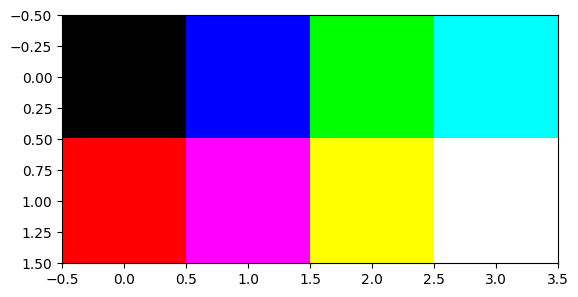

In [8]:
blue_channel = [[0, 1, 0, 1],
                [0, 1, 0, 1]]
green_channel = [[0, 0, 1, 1],
                 [0, 0, 1, 1]]
red_channel = [[0, 0, 0, 0],
               [1, 1, 1, 1]]
rgb = [red_channel, green_channel, blue_channel]

image = torch.FloatTensor(rgb)
print(f"RGB image tensor: \n {image}, with shape:{image.shape}. \n")

print(f"Plotting this tensor: \n ")
plot_tensor(image)

As can be seen now, this high dimensional tensor is actually not that difficult to understand. It can be seen as three 2D matrixes of a certain size, where each matrix represents a certain color value. Those three matrices are then concatenated on the first dimension to represent an RGB image.

### Tensor operations
Now that we understand what tensors are, we want to perform some operations with them. We have all the default operations (sum, difference, quotient, element-wise multiplication), as well as more advanced operations (sin, cos, tan, dot product, ...).

see https://pytorch.org/docs/stable/tensors.html# for a list of all operations.

In [10]:
tensor1 = torch.tensor([[1, 2],[3, 4]])
tensor2 = torch.tensor([[4, 3],[2, 1]])
print(f"Tensor 1:\n\t{tensor1}")
print(f"Tensor 2:\n\t{tensor2}")

sum = tensor1 + tensor2
print(f"The sum is:\n\t{sum}")
difference = tensor1 - tensor2
print(f"The difference is:\n\t{difference}")
product = tensor1 * tensor2
print(f"The element-wise product is:\n\t{product}")
quotient = tensor1 / tensor2
print(f"The division is:\n\t{quotient}")

product_w_constant = tensor1 * 5
print(f"The product with a constant '5' is:\n\t{product_w_constant}")

Tensor 1:
	tensor([[1, 2],
        [3, 4]])
Tensor 2:
	tensor([[4, 3],
        [2, 1]])
The sum is:
	tensor([[5, 5],
        [5, 5]])
The difference is:
	tensor([[-3, -1],
        [ 1,  3]])
The element-wise product is:
	tensor([[4, 6],
        [6, 4]])
The division is:
	tensor([[0.2500, 0.6667],
        [1.5000, 4.0000]])
The product with a constant '5' is:
	tensor([[ 5, 10],
        [15, 20]])


### Broadcasting

Something very usefull and important to keep in mind is that PyTorch can **broadcast** tensors. In short, if a PyTorch operation supports broadcast, then its Tensor arguments can be automatically expanded to be of equal sizes (without making copies of the data).

Two tensors are “broadcastable” if the following rules hold:
- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

*Source https://pytorch.org/docs/stable/notes/broadcasting.html*.


In [14]:
x=torch.empty(5,7,3)
y=torch.empty(5,7,3)
# same shapes are always broadcastable (i.e. the above rules always hold)

x=torch.empty((0,))
y=torch.empty(2,2)
# x and y are not broadcastable, because x does not have at least 1 dimension

# can line up trailing dimensions
x=torch.empty(5,3,4,1)
y=torch.empty(  3,1,1)
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

# but:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:
- If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
- Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

For Example:

In [16]:
# can line up trailing dimensions to make reading easier
x=torch.empty(5,1,4,1)
y=torch.empty(  3,1,1)
print(f"These two tensors are broadcastable \n The resulting size is: {(x+y).size()} \n")

# but not necessary:
x=torch.empty(1)
y=torch.empty(3,1,7)
print(f"These two tensors are broadcastable \n The resulting size is: {(x+y).size()} \n")

# The code below will give a runtime error
x=torch.empty(5,2,4,1)
y=torch.empty(3,1,1)
print(f"These two tensors are not broadcastable \n Adding them together gives us an error:")
z = x+y


These two tensors are broadcastable 
 The resulting size is: torch.Size([5, 3, 4, 1]) 

These two tensors are broadcastable 
 The resulting size is: torch.Size([3, 1, 7]) 

These two tensors are not broadcastable 
 Adding them together gives us an error:


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

# Gradients

Finally we will take a look at how the gradients work. This will become more clear during the lab as well.

Autograd is an automatic differentiation system. Conceptually, autograd records a graph recording all of the operations that created the data as you execute operations on them. This gives you a graph whose leaves are the input tensors and roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule (see example below).

Internally, autograd represents this graph as a graph of Function objects. When computing the forwards pass, autograd simultaneously performs the requested computations and builds up a graph representing the function that computes the gradient (the .grad_fn attribute of each torch.Tensor is an entry point into this graph). When the forwards pass is completed, we evaluate this graph in the backwards pass to compute the gradients.

An example is elaborated below: by default a tensor's "requires grad" field is set to False. This means that no gradients will be calculated, thus the grad field is None.

In [18]:
tensor1 = torch.FloatTensor([[1, 2],[3, 4]])
print(tensor1)
print(f"requires_grad: {tensor1.requires_grad}")
print(f"grad: {tensor1.grad}")

tensor2 = torch.FloatTensor([[4, 3],[2, 1]])
print(tensor2)
print(f"requires_grad: {tensor2.requires_grad}")
print(f"grad: {tensor2.grad}")

tensor([[1., 2.],
        [3., 4.]])
requires_grad: False
grad: None
tensor([[4., 3.],
        [2., 1.]])
requires_grad: False
grad: None


When we set the requires_grad bool to True, the computational graph containing the order of functions will be saved as well. Lets see an example below where we compute the calculation $output = tensor1^2 * tensor2 + 1$

In [22]:
tensor1.requires_grad = True
print(f"tensor1:\n\t{tensor1}")
print(f"tensor2:\n\t{tensor2}")
tensor3 = torch.ones_like(tensor1)
print(f"tensor3:\n\t{tensor3}")

intermidiate_output = torch.pow(tensor1, 2) * tensor2
output = intermidiate_output + tensor3
print(f"\n\nintermidiate_output:\n\t{intermidiate_output}")
print(f"output:\n\t{output}")


# Gradients are cumulated with each backprop, therefore it is safer to zero them out first
tensor1.grad = torch.zeros_like(tensor1)
output.backward(torch.ones_like(output))
print(f"\n\ntensor1.grad:\n\t{tensor1.grad}")

tensor1:
	tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor2:
	tensor([[4., 3.],
        [2., 1.]])
tensor3:
	tensor([[1., 1.],
        [1., 1.]])


intermidiate_output:
	tensor([[ 4., 12.],
        [18., 16.]], grad_fn=<MulBackward0>)
output:
	tensor([[ 5., 13.],
        [19., 17.]], grad_fn=<AddBackward0>)


tensor1.grad:
	tensor([[ 8., 12.],
        [12.,  8.]])


Note a few things here, first the backward function on the intermediate output is a multiplication (MulBackward0), whereas the output itself contains AddBackward0 as function. Second, note how we zero the grads out before running. Comment this line out and run the code above a few times. Notice how the gradients are added every time, thats why it it important to zero them out first. Thirdly, the backward function might seem a bit strange as we give "torch.ones_like(output)" as an argument... This is because we still have a matrix of dimensions 2x2 instead of one single number as output. More specifically, the loss is usual a scalar; in this case, you don't need to put `torch.ones_like(output)`.

Because the output is a matrix of dimensions 2x2, we need to derrive the gradient at every position separately. Lets derive one of the 4 grad elements (1, 1) together:

$\frac{δ output}{δx} = \frac{δ(x^2 * 4 + 1)}{δx} = 8x = 8$ (because x = 1)

As can be seen here, we first derive the funtion with respect to a certain tensor, in our case `tensor1`. When we fill in the value of this tensor, we obtain the gradient of this forward pass with respect to that tensor.

Can you derrive the other elements as well?